In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [6]:
data = pd.read_csv('/content/housing.csv')

# **Data Exploration**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see from here that we have Null Values by looking at 'total_bedrooms'. Hence, we will drop the null values.

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Now we can see that all the Columns have same Non-Null values and we have dropped all the Null values.

**Data Split**
Splitting the data for training and testing.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [13]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14838,-117.10,32.68,49.0,1412.0,350.0,1200.0,332.0,2.0398,NEAR OCEAN,93600.0
433,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,NEAR BAY,192100.0
1266,-121.67,37.99,22.0,1046.0,195.0,527.0,164.0,4.3750,INLAND,213500.0
9854,-121.89,36.59,32.0,784.0,112.0,262.0,114.0,6.9180,NEAR OCEAN,500001.0
2534,-122.05,39.60,34.0,2051.0,342.0,958.0,322.0,2.8466,INLAND,95300.0
...,...,...,...,...,...,...,...,...,...,...
14688,-117.08,32.80,25.0,2963.0,552.0,1162.0,556.0,3.6250,NEAR OCEAN,184500.0
2035,-119.74,36.73,42.0,1236.0,272.0,946.0,261.0,2.0536,INLAND,50000.0
17146,-122.19,37.44,38.0,3383.0,456.0,1203.0,465.0,9.3198,NEAR OCEAN,500001.0
372,-122.16,37.75,24.0,1790.0,454.0,1137.0,386.0,2.5370,NEAR BAY,107900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

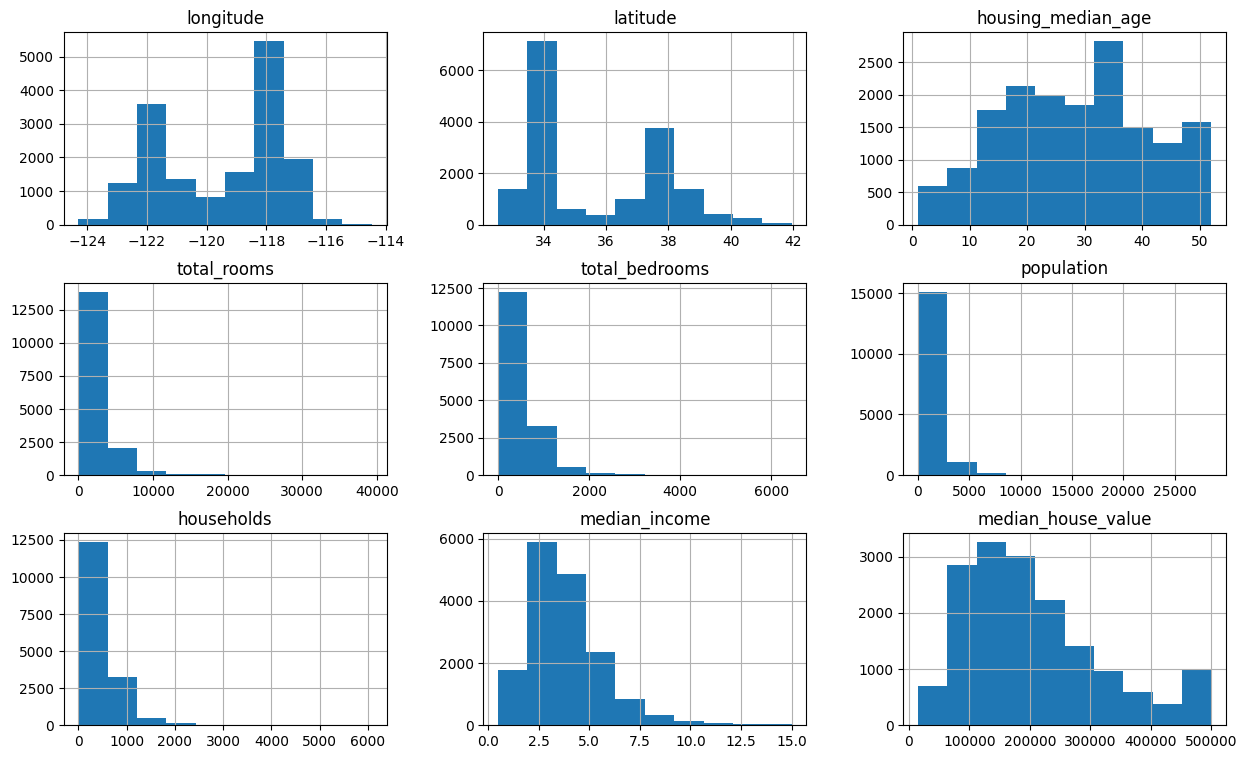

In [14]:
train_data.hist(figsize=(15, 9))

<ipython-input-15-58c8100cd55d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot= True, cmap= 'YlGnBu')


<Axes: >

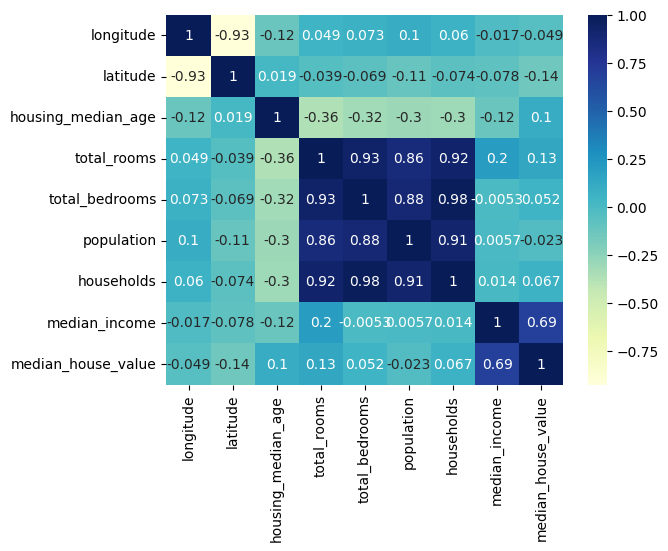

In [15]:
sns.heatmap(train_data.corr(), annot= True, cmap= 'YlGnBu')

**Main Findings:**
1. 'median_income' and 'median_house_value' are strongly correlated.
2. 'longitude' and 'latitude' are negatively correlated with 'median_house_value'.

# **Data Preprocessing**

As we can see in the above histograms that some of the parameters are skewed, so we will apply log to balance them.

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

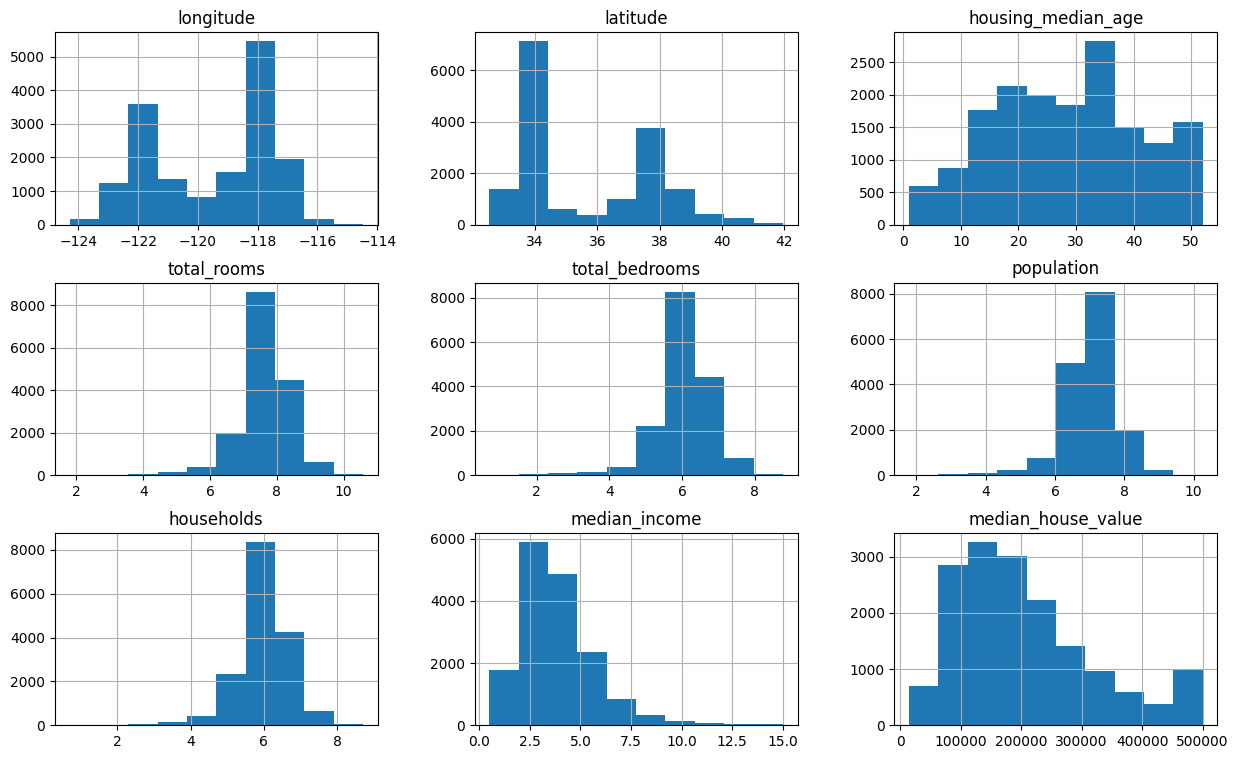

In [17]:
train_data.hist(figsize= (15, 9))

If we remember we have 'ocean_proximity' in our dataset. To use that feature we have to give that parameter a numeric representation.

In [18]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7200
INLAND        5203
NEAR OCEAN    2092
NEAR BAY      1849
ISLAND           2
Name: ocean_proximity, dtype: int64

In [19]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14838,0,0,0,0,1
433,0,0,0,1,0
1266,0,1,0,0,0
9854,0,0,0,0,1
2534,0,1,0,0,0
...,...,...,...,...,...
14688,0,0,0,0,1
2035,0,1,0,0,0
17146,0,0,0,0,1
372,0,0,0,1,0


In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

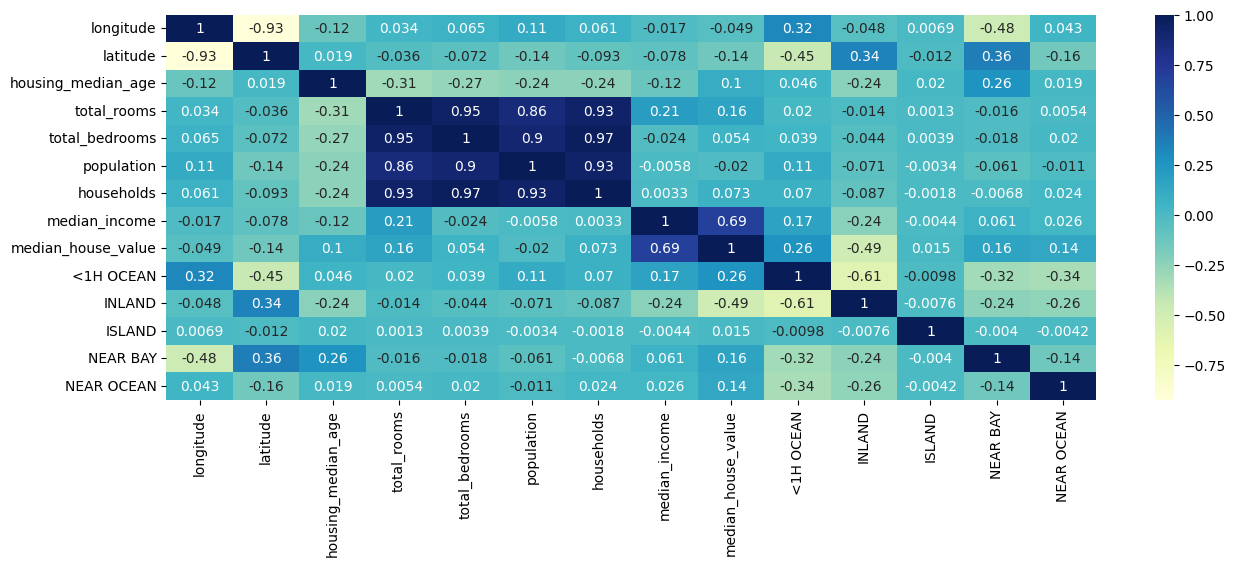

In [21]:
plt.figure(figsize=(15, 5))
sns.heatmap(train_data.corr(), annot= True, cmap= 'YlGnBu')

**Main Findings:**

1. 'median_house_value' has weak correlation with 'Inland' parameter. It means that you pay less for houses that are in inland.
2. Correlation grows stronger as you move towards the ocean.

<Axes: xlabel='latitude', ylabel='longitude'>

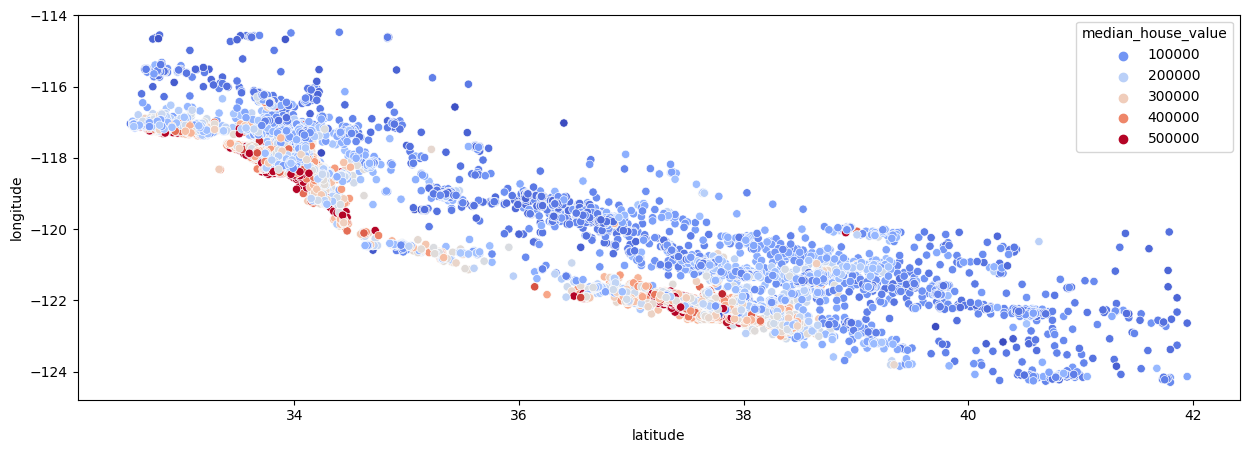

In [22]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='latitude', y='longitude', data= train_data, hue= 'median_house_value', palette='coolwarm')

This scatterplot is a good visualization example as it helps us indicate that the bottom-left of the plot is ocean and properties near the coast are expensive.

# **Feature Engineering**

Finding out the ratio between 'total_rooms' and 'total_bedrooms'.

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_bedrooms'] / train_data['households']

<Axes: >

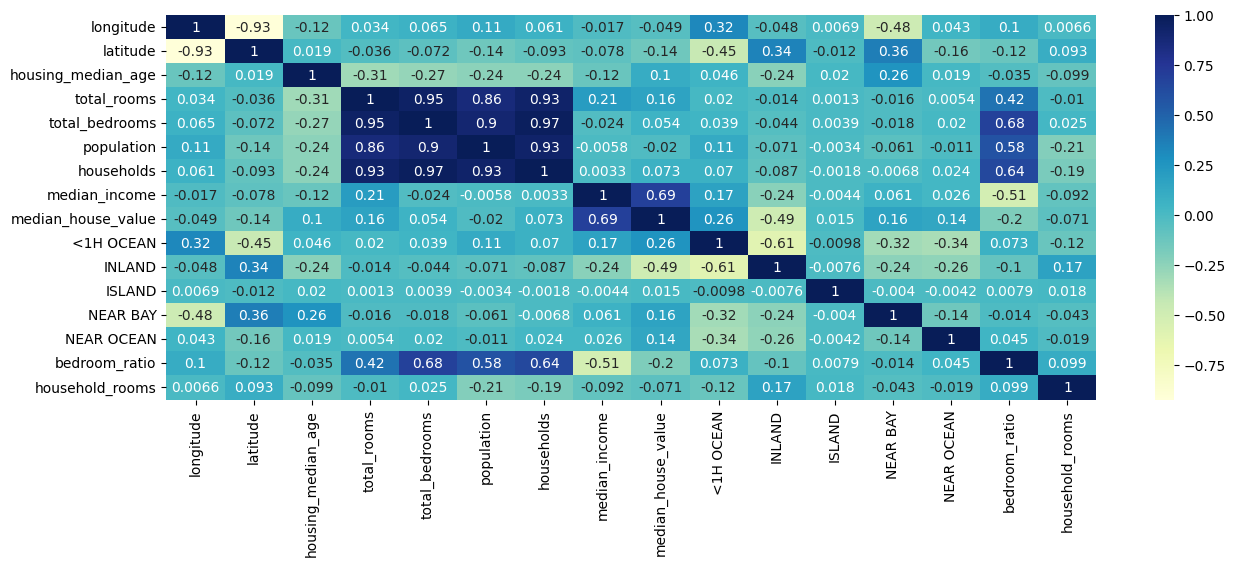

In [24]:
plt.figure(figsize=(15, 5))
sns.heatmap(train_data.corr(), annot= True, cmap= 'YlGnBu')

**Main Findings:**

1. 'bedroom_ratio' has negative correlation with 'median_house_value'.

# **ML Model: Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'])
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis= 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_bedrooms'] / test_data['households']

In [27]:
X_test, Y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']

In [28]:
regressor.score(X_test, Y_test)

0.6780572890134604

# **ML Model: Random Forest Model**

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_test, Y_test)

RandomForestRegressor()

In [30]:
forest.score(X_test, Y_test)

0.9664015285525832